In [2]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import RectangleSelector
import skimage.util
import scipy.ndimage as ndimage
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.io import imread
import matplotlib
import skimage.restoration as restoration

import skimage.filters.rank as rank
plt.gray()
def PSNR(f,g):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))


class Selector:
    def __init__(self, ax):
        self.RS = RectangleSelector(ax, self.line_select_callback,
                                     useblit=True,
                                       button=[1, 3],  
                                       minspanx=5, minspany=5,
                                       spancoords='pixels',
                                       interactive=True)
        self.bbox = [None, None, None, None]
        
    def line_select_callback(self,eclick, erelease):
        'eclick and erelease are the press and release events'
        x1, y1 = eclick.xdata, eclick.ydata
        x2, y2 = erelease.xdata, erelease.ydata
        self.bbox = [int(y1), int(y2), int(x1), int(x2)]
    def get_bbox(self):
        return self.bbox

f = imread('cameraman.tif').astype(np.float64)/255
I = imread('degraded.tif').astype(np.float64)/255


<Figure size 640x480 with 0 Axes>

0.031692677070828235 0.9166866746698679


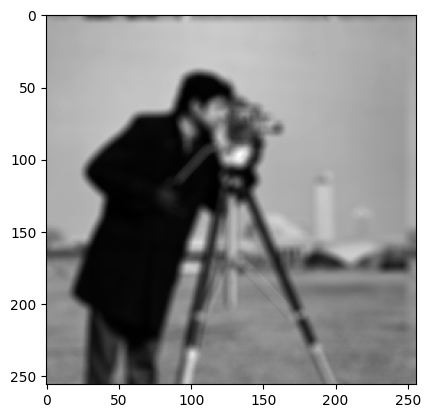

16.313347655863858


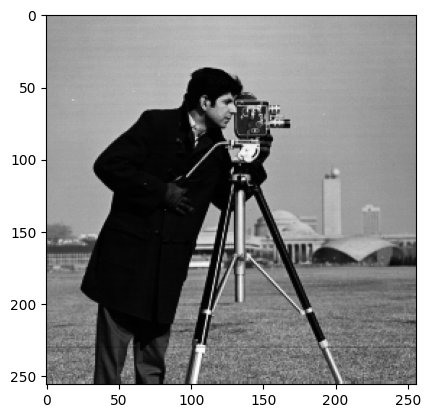

16.313347655863858


In [12]:
h_d = disk(4)
h = np.zeros((256,256))

h[0:9,0:9] = h_d
h = np.roll(h, (-5,-5)) / np.sum(h)
h_freq = np.fft.fft2(h)
f_blurfreq = h_freq*np.fft.fft2(f)
f_blur = np.real(np.fft.ifft2(f_blurfreq))

plt.imshow(f_blur)
print(f_blur.min(), f_blur.max())
plt.show()

def PSNR(f,g):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))

print(PSNR(f_blur,f))

plt.imshow(abs(np.fft.ifft2(f_blurfreq/h_freq)))
plt.show()
print(PSNR(abs(np.fft.ifft2(f_blurfreq/h_freq)), f_blur))

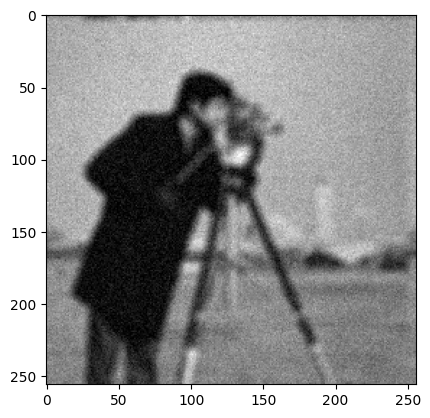

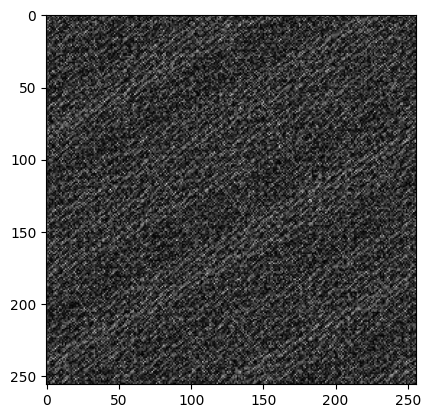

-37.602697463438325


In [15]:
noisyblur = skimage.util.random_noise(f_blur, mode='gaussian', var=0.002)

plt.imshow(noisyblur)   
plt.show()
gaussfreq = np.fft.fft2(noisyblur)
nbfiltered = abs(np.fft.ifft2(gaussfreq/h_freq))
plt.imshow(nbfiltered)
plt.show()

print(PSNR(nbfiltered, f))

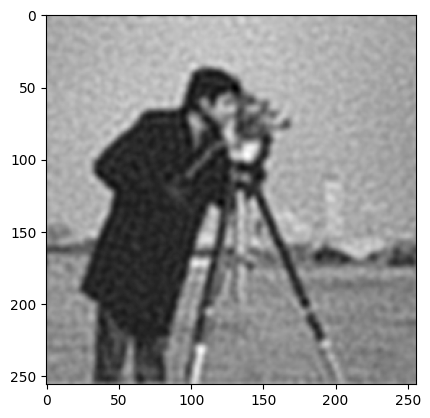

In [ ]:
restored = skimage.restoration.wiener(noisyblur, np.fft.fftshift(h), 0.1)
plt.imshow(restored)
plt.show()